In [31]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [32]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('newClusteredChurn (1).csv')

## Playing with features a little more

In [33]:
#remove all those people who had their first transactions on final year
df = df[df['2015_lt_trans_year'] != 1]

In [34]:
df['AvgNumberOfDays_forTrans'] = df['DaysBetweenFL(L-1)']/df['CountTransactions']

In [35]:
df.columns.values

array(['ID_user', 'Age', 'CountTransactions', 'DaysBetweenFL(L-1)',
       'DaysBetweenLastTrAndToday', 'AgeGroupOrder', 'StDevPrice',
       'CountOrders', 'TransactionsPerOrder', 'SpentPerOrder',
       'SpentPerTransaction', 'MoneySpentTotal', 'FirstTransactionDate(1)',
       'LastTransactionDate(L)', 'DistinctCountProducts',
       'DistinctCountProductCategories', 'MostFrequentCategory',
       'CountTransInMostFreqCat', 'MostSpentCategory',
       'SpentInMostSpentCat', 'DaysFrom1TrTo1YearChurn',
       'DaysFrom1TrTo05YearChurn', 'AgeGroupLabels', '18-24', '25-34',
       '35-44', '45-54', '55-64', '65', 'female', 'male', 'unknown', 'Apr',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'FirstTransactionSeason', 'LastTransactionSeason',
       '2010_lt_trans_year', '2011_lt_trans_year', '2012_lt_trans_year',
       '2013_lt_trans_year', '2014_lt_trans_year', '2015_lt_trans_year',
       '2010', '2011', '2012', '2013', '2014', '2015',
 

In [40]:
x_feature_names = ['CountTransactions','SpentPerTransaction', 'MoneySpentTotal',
       'DistinctCountProductCategories', 'MostFrequentCategory',
       'CountTransInMostFreqCat', 'MostSpentCategory', '18-24', '25-34',
       '35-44', '45-54', '55-64', '65', 'Less18', 'female', 'male', 'unknown', 'Apr',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'FirstTransactionSeason', 'LastTransactionSeason',
       'SpentPerTransaction2', 'DaysBetweenFL(L-1)', 'AvgNumberOfDays_forTrans','2010', '2011', '2012']

X = df[x_feature_names]
X.head()

y = df['ChurnUpd']

In [41]:
class_label_dict = dict(y.value_counts())
class_label_dict

{0: 2333, 1: 3923}

In [42]:
for i in range(0, len(x_feature_names)):
    print (i, x_feature_names[i])

(0, 'CountTransactions')
(1, 'SpentPerTransaction')
(2, 'MoneySpentTotal')
(3, 'DistinctCountProductCategories')
(4, 'MostFrequentCategory')
(5, 'CountTransInMostFreqCat')
(6, 'MostSpentCategory')
(7, '18-24')
(8, '25-34')
(9, '35-44')
(10, '45-54')
(11, '55-64')
(12, '65')
(13, 'Less18')
(14, 'female')
(15, 'male')
(16, 'unknown')
(17, 'Apr')
(18, 'Aug')
(19, 'Dec')
(20, 'Feb')
(21, 'Jan')
(22, 'Jul')
(23, 'Jun')
(24, 'Mar')
(25, 'May')
(26, 'Nov')
(27, 'Oct')
(28, 'Sep')
(29, 'FirstTransactionSeason')
(30, 'LastTransactionSeason')
(31, 'SpentPerTransaction2')
(32, 'DaysBetweenFL(L-1)')
(33, 'AvgNumberOfDays_forTrans')
(34, '2010')
(35, '2011')
(36, '2012')


## Feature Scaling and Selection

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_new = scaler.fit_transform(X)

## Train Test Split

In [44]:
train_x, test_x, train_y, test_y = cross_validation.train_test_split(X, y, train_size=0.8, random_state=3)

## Models

In [45]:
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
#from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## create dict for class weights

In [46]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y)
class_weight_dict = {0:class_weight[0], 1:class_weight[1]}
class_weight_dict

{0: 1.3437164339419978, 1: 0.79630808402291531}

In [47]:
#draw confusion matrix
def draw_confusion_matrix(true,preds):
    conf_matx = metrics.confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=False,annot_kws={"size": 16},fmt='g', cbar=False)
    sns.plt.show()
    return conf_matx

In [209]:
#draw roc curve and give auc
def give_auc_draw_roc(test_values, prediction_values):
    fpr, tpr, thresholds = metrics.roc_curve(test_values, prediction_values)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC Curve, AUC=%s'%(auc))
    plt.savefig('roc_auc.png')
    return auc
    
    #auc = np.trapz(true_pos,false_pos)
    #return auc

In [49]:
#Random Forest Classifier

params = {'bootstrap':[True]}

rfm = GridSearchCV(RandomForestClassifier(class_weight=class_weight_dict, n_estimators=1000), params, n_jobs=-1, cv=3, 
                   scoring='roc_auc')
#rfm = RandomForestClassifier(max_depth=7, n_estimators=1000)
rfm = rfm.fit(train_x, train_y)
rfm_preds = rfm.predict(test_x)

print params
print (rfm.best_params_, rfm.best_score_) 

{'bootstrap': [True]}
({'bootstrap': True}, 0.8756268668436051)


In [15]:
#get churn probabilities from random forest
#X['probab_churn'] = pd.DataFrame(xyz)

In [30]:
#probab_churn = pd.DataFrame(xyz)

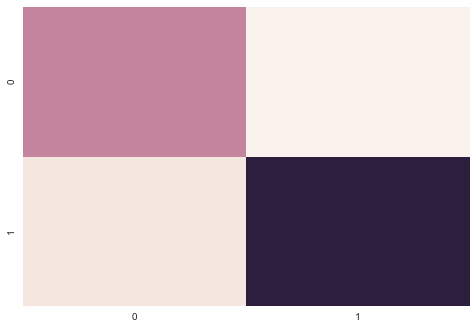

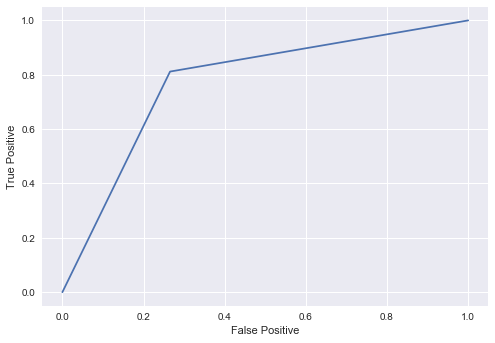

0.7731934941049502

In [50]:
#confusion matrix for random forest on test data
rfm_conf_matx = draw_confusion_matrix(test_y, rfm_preds)
give_auc_draw_roc(test_y, rfm_preds)

In [52]:
#logistic regression classifier
params = {'penalty':['l2','l1'], 'C':np.logspace(0.01, 2, 10)}

lr = GridSearchCV(LogisticRegression(), params, n_jobs=-1, cv=3, scoring='roc_auc')
lr = lr.fit(train_x, train_y)
lr_preds = lr.predict(test_x)

print params
print (lr.best_params_, lr.best_score_)

{'penalty': ['l2', 'l1'], 'C': array([   1.02329299,    1.70259405,    2.83284115,    4.71338954,
          7.84231792,   13.04834874,   21.71034209,   36.12249817,
         60.10199512,  100.        ])}
({'penalty': 'l1', 'C': 1.7025940490861411}, 0.7779146446915555)


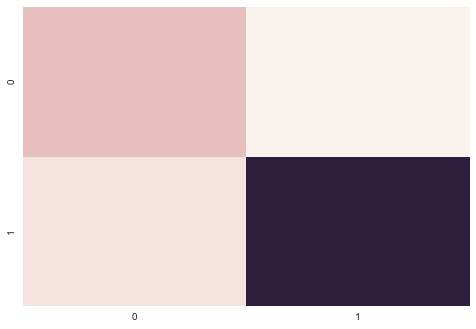

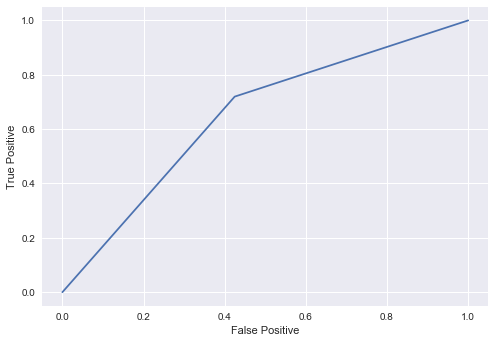

0.64748090938994318

In [53]:
draw_confusion_matrix(test_y, lr_preds)
give_auc_draw_roc(test_y, lr_preds)

In [54]:
#Bagging Classifier
params = {'bootstrap':[True]}

bc = GridSearchCV(BaggingClassifier(n_estimators=1500), params, n_jobs=-1, cv=3, scoring='roc_auc')
#rfm = RandomForestClassifier(max_depth=7, n_estimators=1000)
bc = bc.fit(train_x, train_y)
bc_preds = bc.predict(test_x)

print params
print (bc.best_params_, bc.best_score_) 

{'bootstrap': [True]}
({'bootstrap': True}, 0.8801453733022033)


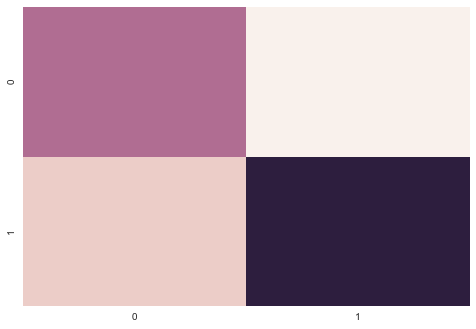

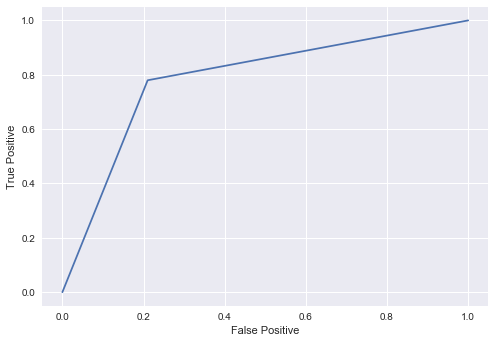

0.78478922172292587

In [55]:
draw_confusion_matrix(test_y, bc_preds)
give_auc_draw_roc(test_y, bc_preds)

In [58]:
# svm
params = {'C': np.logspace(1, 3, 10) ,'gamma': [0.001], 'kernel': ['rbf']}

svc = GridSearchCV(SVC(class_weight=class_weight_dict), params, n_jobs = -1, cv=3, scoring = 'roc_auc')
svc = svc.fit(train_x, train_y)
svc_preds = svc.predict(test_x)

print("Best C & associated score", svc.best_params_, svc.best_score_)

('Best C & associated score', {'kernel': 'rbf', 'C': 1000.0, 'gamma': 0.001}, 0.5696703218341443)


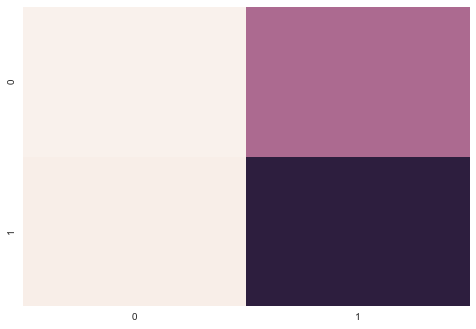

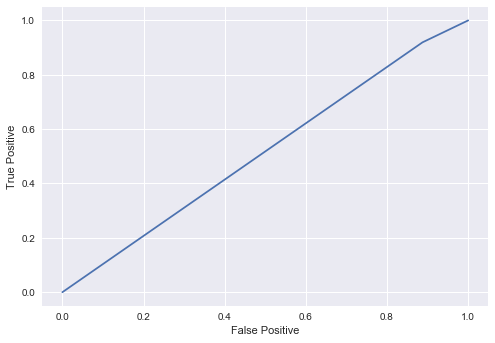

0.51593036310897611

In [57]:
draw_confusion_matrix(test_y, svc_preds)
give_auc_draw_roc(test_y, svc_preds)

In [59]:
#Xgboost

params =  {'learning_rate':[0.1], 'n_estimators':np.logspace(0.01,3,10, dtype=int), 'scale_pos_weight':[1.7]}

xgb = GridSearchCV(XGBClassifier(), params, n_jobs=-1, cv=3, scoring='roc_auc')
xgb = xgb.fit(train_x, train_y)
xgb_preds = xgb.predict(test_x)

print("Best C & associated score", xgb.best_params_, xgb.best_score_)

('Best C & associated score', {'n_estimators': 465, 'scale_pos_weight': 1.7, 'learning_rate': 0.1}, 0.8877473738345579)


[   1    2    4   10   21   46  100  216  465 1000]


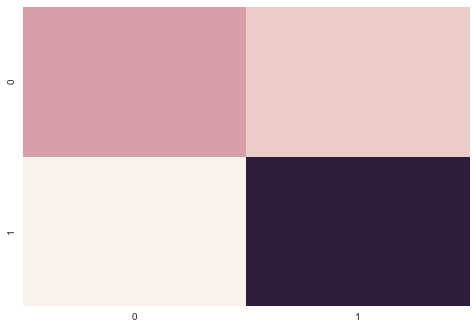

array([[289, 182],
       [ 96, 685]])

In [60]:
print np.logspace(0.01,3,10, dtype=int)
draw_confusion_matrix(test_y, xgb_preds)

In [61]:
#extra trees classifier
params = {'criterion': ['entropy']}
etc = GridSearchCV(ExtraTreesClassifier(n_estimators = 1000, class_weight=class_weight_dict), params, 
                   n_jobs = -1, cv=3, scoring = 'roc_auc')
etc.fit(train_x, train_y)
etc_preds = etc.predict(test_x)

print("Best params & associated score", etc.best_params_, etc.best_score_)

('Best params & associated score', {'criterion': 'entropy'}, 0.8523638100030099)


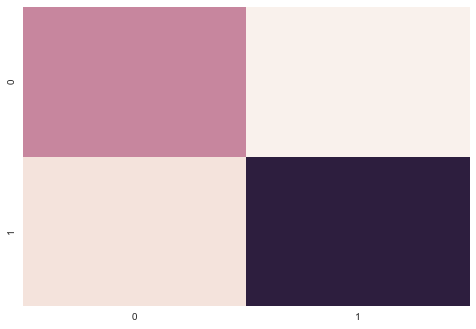

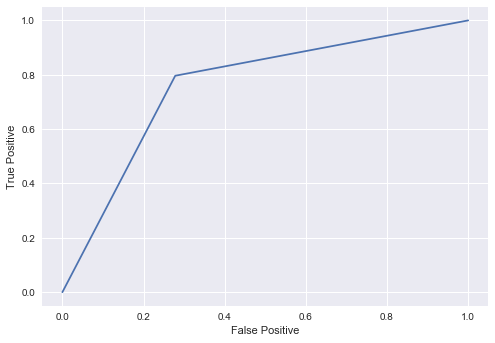

0.75914160896667404

In [62]:
draw_confusion_matrix(test_y, etc_preds)
give_auc_draw_roc(test_y, etc_preds)

In [63]:
#ada boost classifier
params = {'learning_rate': np.linspace(0.01, 0.2, 10)}
abc = GridSearchCV(AdaBoostClassifier(n_estimators = 1000), params, n_jobs = -1, cv=3, scoring = 'roc_auc')
abc.fit(train_x, train_y)
abc_preds = abc.predict(test_x)

print("Best params & associated score", abc.best_params_, abc.best_score_)

('Best params & associated score', {'learning_rate': 0.20000000000000001}, 0.824977064916935)


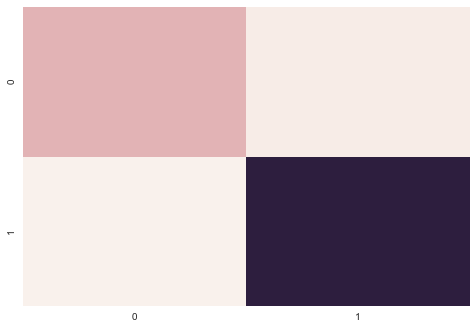

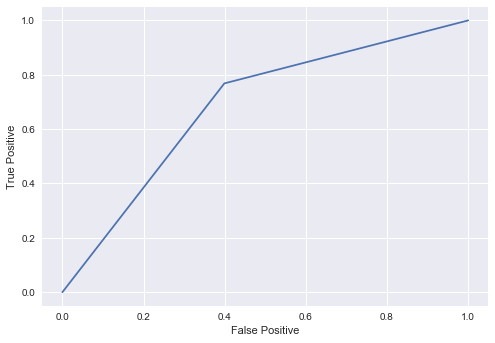

0.68454754778429305

In [77]:
draw_confusion_matrix(test_y, abc_preds)
give_auc_draw_roc(test_y, abc_preds)

In [66]:
#gradient boosting classifier
params = {'loss': ['deviance', 'exponential']}
gbc = GridSearchCV(GradientBoostingClassifier(n_estimators = 1000), params, n_jobs = -1, cv=3, scoring = 'roc_auc')
gbc.fit(train_x, train_y)
gbc_preds = gbc.predict(test_x)

print("Best params & associated score", gbc.best_params_, gbc.best_score_)

('Best params & associated score', {'loss': 'exponential'}, 0.8876484512880138)


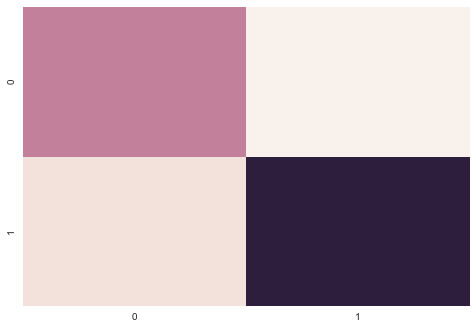

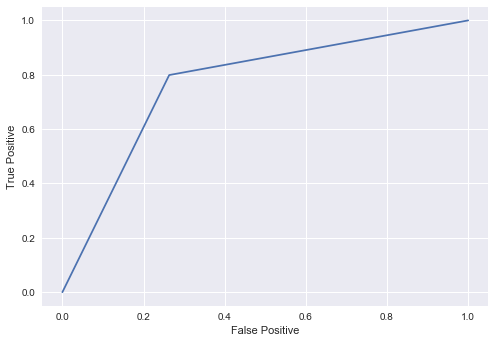

0.76785301657464577

In [78]:
draw_confusion_matrix(test_y, gbc_preds)
give_auc_draw_roc(test_y, gbc_preds)

## Storing the new predictions as features

In [148]:
new_X_preds = np.vstack((rfm_preds, lr_preds, svc_preds, gbc_preds, abc_preds, xgb_preds, etc_preds)).T
print np.shape(new_X_preds)

(1252, 7)


In [153]:
params = {}
ensembled_model = LogisticRegression(penalty='l2', C=0.1)
ensembled_model.fit(new_X_preds, test_y)

#print("Best params & associated score", ensembling.best_params_, ensembling.best_score_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [222]:
ensembled_model.coef_[0]

array([ 0.78,  0.24, -0.38,  0.77,  0.06,  0.66,  0.67])

In [254]:
coef_dict = {}
mod_fts = ['RandomForest', 'LogisticRegression', 'SVM', 'GBC', 'ADB', 'XGB', 'ETC']
for coef, feat in zip(ensembled_model.coef_[0],mod_fts):
    coef_dict[feat] = coef
    
x = pd.DataFrame(coef_dict.values(), coef_dict.keys())

x['Model Names'] = x.index
x['Coeffs'] = x[0] 
x = x.drop(0, axis=1)
x = x.reset_index()
x= x.drop('index', axis=1)
x

from tabulate import tabulate

print tabulate(x, headers='keys', tablefmt='psql')

+----+--------------------+-----------+
|    | Model Names        |    Coeffs |
|----+--------------------+-----------|
|  0 | LogisticRegression |  0.235712 |
|  1 | GBC                |  0.765893 |
|  2 | RandomForest       |  0.776694 |
|  3 | XGB                |  0.65708  |
|  4 | ETC                |  0.668268 |
|  5 | SVM                | -0.380972 |
|  6 | ADB                |  0.061877 |
+----+--------------------+-----------+


In [194]:
scores = cross_validation.cross_val_score(ensembled_model, new_X_preds, test_y, cv=3, scoring='precision')

np.mean(scores)

0.79485752891087535

In [193]:
scores = cross_validation.cross_val_score(ensembled_model, new_X_preds, test_y, cv=3, scoring='recall')

np.mean(scores)

0.84636015325670499

In [213]:
scores = cross_validation.cross_val_score(ensembled_model, new_X_preds, test_y, cv=3, scoring='roc_auc')

np.mean(scores)

0.84218260650283494

In [161]:
ensemble_predictions = ensembled_model.predict(new_X_preds)


Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.21  0.79]]


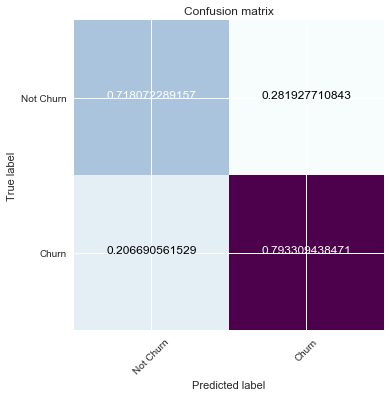

In [164]:
conf_matrix = metrics.confusion_matrix(ensemble_predictions, test_y)
plot_confusion_matrix(conf_matrix, ['Not Churn', 'Churn'])
plt.show()
conf_matx_fig = plt.gcf()
conf_matx_fig.savefig('conf_matx.pdf', dpi=100)

In [212]:
give_auc_draw_roc(ensemble_predictions, test_y)

0.75569086381367767

[ 1.86 -0.59  1.86 ..., -1.25 -1.07  0.03]


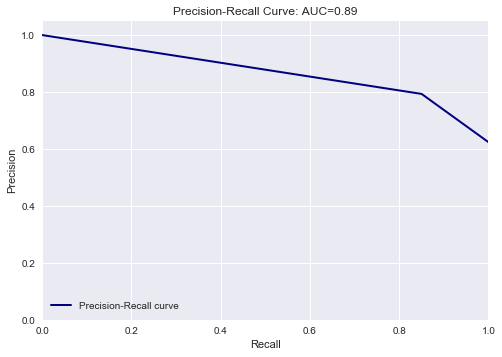

In [211]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

y_score = ensembled_model.fit(new_X_preds, test_y).decision_function(new_X_preds)

print y_score
colors = cycle(['darkorange', 'cornflowerblue', 'teal'])
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(test_y,
                                                        ensemble_predictions)
    average_precision[i] = average_precision_score(ensemble_predictions, test_y)
 

average_precision["micro"] = average_precision_score(test_y, y_score,
                                                     average="micro")


lw = 2
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

In [163]:
import itertools
from pylab import savefig
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt